# OSEMN Exercises

In [3]:
%matplotlib inline
import numpy as np

1\. Create a random list of numbers and then save it to a text file named ``simple_data.txt``

In [4]:
lst = np.random.randint(100, size=(10, 5))
np.savetxt('simple_data.txt', lst, fmt='%d', delimiter=' ')

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [5]:
mat = np.random.rand(5, 5)
np.savetxt('data.txt', mat, fmt='%.3f', delimiter=' ')

3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [6]:
import csv

with open('data.txt', 'r') as infile, open('data.csv', 'w') as outfile:
    reader = csv.reader(infile, delimiter=' ')
    writer = csv.writer(outfile)
    for line in reader:
        writer.writerow(line)

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [7]:
import struct

with open('credit_card.dat', 'rb') as file:
    while (line := file.readline()):
        print(''.join(chr(int(line[i * 6:(i + 1) * 6], base=2))
                      for i in range(len(line) // 6)))

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 8054 1600
8142 4055 1776 0026
3026 7380 1241 1084


5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [8]:
import json

data = json.load(open('user_data.json', 'r'))
amexpress = [x for x in data if x['CreditCardType'] == 'American Express']
print(json.dumps(amexpress[:3], indent=2))

[
  {
    "ID": "2",
    "JobTitle": "Investment  Advisor",
    "EmailAddress": "Clint_Thorpe5003@bulaffy.com",
    "FirstNameLastName": "Clint Thorpe",
    "CreditCard": "7083-8766-0251-2345",
    "CreditCardType": "American Express"
  },
  {
    "ID": "12",
    "JobTitle": "Retail Trainee",
    "EmailAddress": "Phillip_Carpenter9505@famism.biz",
    "FirstNameLastName": "Phillip Carpenter",
    "CreditCard": "3657-0088-0820-5247",
    "CreditCardType": "American Express"
  },
  {
    "ID": "28",
    "JobTitle": "Project Manager",
    "EmailAddress": "Russel_Graves1378@extex.org",
    "FirstNameLastName": "Russel Graves",
    "CreditCard": "6718-4818-8011-6024",
    "CreditCardType": "American Express"
  }
]


6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe what you see


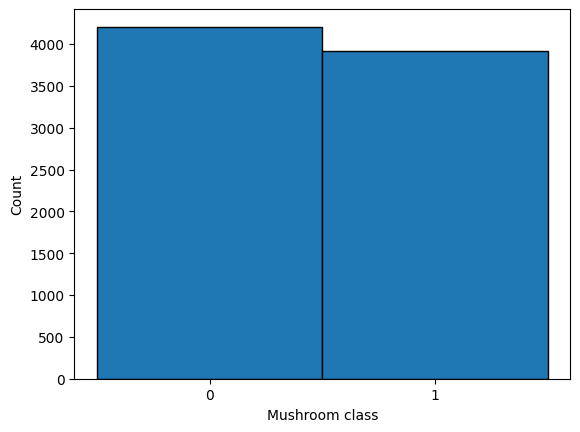

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mushrooms_categorized.csv')
plt.hist(data['class'],
         bins=np.arange(0, data['class'].max() + 1.5) - 0.5,
         ec='k')
plt.locator_params(axis='x', integer=True)
plt.xlabel('Mushroom class')
plt.ylabel('Count')
plt.show()

7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

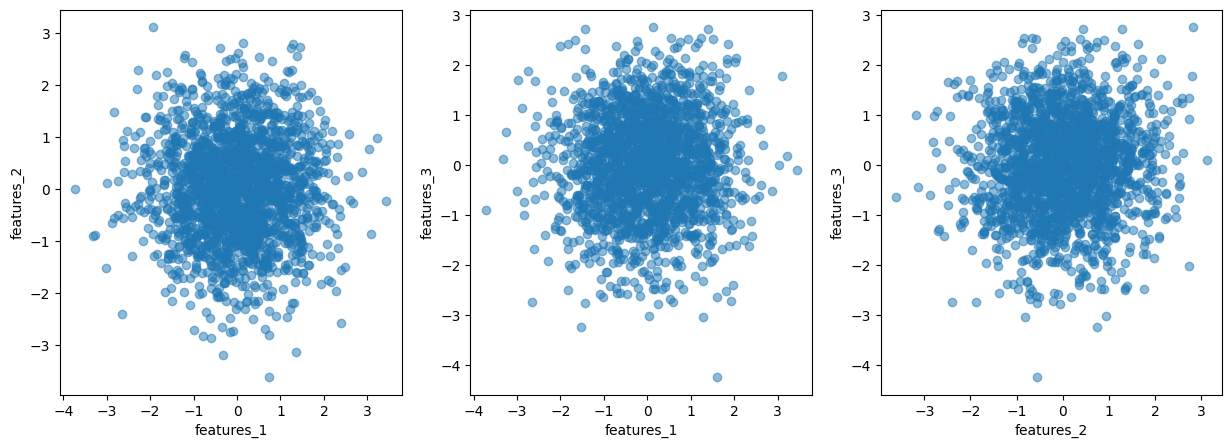

In [10]:
data = pd.read_csv('regression_generated.csv')

combinations = ((1, 2), (1, 3), (2, 3))
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for idx, (f1, f2) in enumerate(combinations):
    ax[idx].plot(data.iloc[:, f1], data.iloc[:, f2], 'o', alpha=0.5)
    ax[idx].set_xlabel(data.columns[f1])
    ax[idx].set_ylabel(data.columns[f2])

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [11]:
data = pd.read_csv('mushrooms_categorized.csv')
data.to_json('mushrooms_categorized.json', orient='records')